In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# ds083  GFS    NAM
# 1deg   0.5deg  12km
# p1s1   p2s2   p7s7
# https://www.ncdc.noaa.gov/data-access/model-data/model-datasets/north-american-mesoscale-forecast-system-nam
# https://www.ncdc.noaa.gov/data-access/model-data/model-datasets/global-forcast-system-gfs

In [2]:
#D:\ssrello\Dropbox\Doctorado\Articulo_Sodar\exp6\interp
expruns = ['20120816_d03_gfs05_p1r1', '20120816_d03_gfs05_p1r5', '20120816_d03_gfs05_p1r5', 
           '20120816_d03_gfs05_p2r1', '20120816_d03_gfs05_p2r5', '20120816_d03_gfs05_p2r5', 
           '20120816_d03_nam32_p1r1', '20120816_d03_nam32_p1r3','20120816_d03_nam32_p1r5',
           '20120816_d03_nam32_p2r1', '20120816_d03_nam32_p2r3','20120816_d03_nam32_p2r5',]
expnames = ['g1r1', 'g1r3', 'g1r5', 'g2r1', 'g2r3', 'g2r5', 'n1r1', 'n1r3', 'n1r5', 'n2r1', 'n2r3', 'n2r5']
expruns[1]

'20120816_d03_gfs05_p1r5'

In [3]:
#ls interp

In [4]:

# READ WRF INTERP DATA
idw = [0,2,3,4,5,6,7,8,9,10,11]
ids = [0,2,7,12,17,22,27,32,37,42,47]
dt1s, dt2s, dt3s = '2012-08-16 12:00', '2012-08-17 12:00', '2012-08-18 12:00'
dt1e, dt2e, dt3e = '2012-08-17 12:00', '2012-08-18 12:00', '2012-08-19 12:00'

w1 = pd.read_pickle('interp/wind_'+expruns[0]+'.pk').iloc[:,idw]
w2 = pd.read_pickle('interp/wind_'+expruns[1]+'.pk').iloc[:,idw]
w3 = pd.read_pickle('interp/wind_'+expruns[2]+'.pk').iloc[:,idw]
w4 = pd.read_pickle('interp/wind_'+expruns[3]+'.pk').iloc[:,idw]
w5 = pd.read_pickle('interp/wind_'+expruns[4]+'.pk').iloc[:,idw]
w6 = pd.read_pickle('interp/wind_'+expruns[5]+'.pk').iloc[:,idw]
w7 = pd.read_pickle('interp/wind_'+expruns[6]+'.pk').iloc[:,idw]
w8 = pd.read_pickle('interp/wind_'+expruns[7]+'.pk').iloc[:,idw]
w9 = pd.read_pickle('interp/wind_'+expruns[8]+'.pk').iloc[:,idw]
w10 = pd.read_pickle('interp/wind_'+expruns[9]+'.pk').iloc[:,idw]
w11 = pd.read_pickle('interp/wind_'+expruns[10]+'.pk').iloc[:,idw]
w12 = pd.read_pickle('interp/wind_'+expruns[11]+'.pk').iloc[:,idw]

d1 = pd.read_pickle('interp/wdir_'+expruns[0]+'.pk').iloc[:,idw]
d2 = pd.read_pickle('interp/wdir_'+expruns[1]+'.pk').iloc[:,idw]
d3 = pd.read_pickle('interp/wdir_'+expruns[2]+'.pk').iloc[:,idw]
d4 = pd.read_pickle('interp/wdir_'+expruns[3]+'.pk').iloc[:,idw]
d5 = pd.read_pickle('interp/wdir_'+expruns[4]+'.pk').iloc[:,idw]
d6 = pd.read_pickle('interp/wdir_'+expruns[5]+'.pk').iloc[:,idw]
d7 = pd.read_pickle('interp/wdir_'+expruns[6]+'.pk').iloc[:,idw]
d8 = pd.read_pickle('interp/wdir_'+expruns[7]+'.pk').iloc[:,idw]

t1 = pd.read_pickle('interp/tmpv_'+expruns[0]+'.pk').iloc[:,idw]
t2 = pd.read_pickle('interp/tmpv_'+expruns[1]+'.pk').iloc[:,idw]
t3 = pd.read_pickle('interp/tmpv_'+expruns[2]+'.pk').iloc[:,idw]
t4 = pd.read_pickle('interp/tmpv_'+expruns[3]+'.pk').iloc[:,idw]
t5 = pd.read_pickle('interp/tmpv_'+expruns[4]+'.pk').iloc[:,idw]
t6 = pd.read_pickle('interp/tmpv_'+expruns[5]+'.pk').iloc[:,idw]
t7 = pd.read_pickle('interp/tmpv_'+expruns[6]+'.pk').iloc[:,idw]
t8 = pd.read_pickle('interp/tmpv_'+expruns[7]+'.pk').iloc[:,idw]
t9 = pd.read_pickle('interp/tmpv_'+expruns[8]+'.pk').iloc[:,idw]
t10 = pd.read_pickle('interp/tmpv_'+expruns[9]+'.pk').iloc[:,idw]
t11 = pd.read_pickle('interp/tmpv_'+expruns[10]+'.pk').iloc[:,idw]
t12 = pd.read_pickle('interp/tmpv_'+expruns[11]+'.pk').iloc[:,idw]

sodar_w = pd.read_pickle('sodar_sp.pk')
sodar_t = pd.read_pickle('sodar_tv.pk')
#sodarw01 = sodar_w.iloc[:,ids][dt11s : dt13e].interpolate()

sodarw1 = sodar_w.iloc[:,ids][dt1s : dt1e].interpolate()
sodarw2 = sodar_w.iloc[:,ids][dt2s : dt2e].interpolate()
sodarw3 = sodar_w.iloc[:,ids][dt3s : dt3e].interpolate()
sodart1 = sodar_t.iloc[:,ids][dt1s : dt1e].interpolate()
sodart2 = sodar_t.iloc[:,ids][dt2s : dt2e].interpolate()
sodart3 = sodar_t.iloc[:,ids][dt3s : dt3e].interpolate()
sodarw = sodar_w.iloc[:,ids][dt1s : dt3e].interpolate()
sodart = sodar_t.iloc[:,ids][dt1s : dt3e].interpolate()

In [5]:
print(w1.shape, sodarw.shape)

(145, 11) (145, 11)


In [6]:
def panelPlot():
    fig, axs = plt.subplots(2, 2, figsize=(12,7))
    fig.subplots_adjust(left=0.08, right=0.98, wspace=0.15)
    for axl in range(0,2):
        for axc in range(0,2):
            plt.setp( axs[axl,axc].xaxis.get_majorticklabels(), rotation=25 )
            axs[0,0].set_ylabel('Wind Speed')
            axs[1,0].set_ylabel('Virtual Temperature')

    ax = axs[0, 0]
    ax.plot(x1, sodarw_1, label='sodarW')
    ax.plot(w2_1, label=expnames[1])
    ax.plot(w3_1, label=expnames[2])
    ax.plot(w4_1, label=expnames[3])
    ax.legend();

    ax = axs[0, 1]
    ax.plot(x2, sodarw_2, label='sodarW')
    ax.plot(w2_2, label=expnames[1])
    ax.plot(w3_2, label=expnames[2])
    ax.plot(w4_2, label=expnames[3])
    ax.legend();

    #ax = axs[0, 2]
    #ax.plot(x3, sodarw_3, label='sodarW')
    #ax.plot(w2_3, label=expnames[1])
    #ax.plot(w3_3, label=expnames[2])
    #ax.plot(w4_3, label=expnames[3])
    #ax.legend();

    ax = axs[1, 0]
    ax.plot(x1, sodart_1, label='sodarTV')
    ax.plot(t2_1, label=expnames[1])
    ax.plot(t3_1, label=expnames[2])
    ax.plot(t4_1, label=expnames[3])
    ax.legend();

    ax = axs[1, 1]
    ax.plot(x2, sodart_2, label='sodarTV');
    ax.plot(t2_2, label=expnames[1])
    ax.plot(t3_2, label=expnames[2])
    ax.plot(t4_2, label=expnames[3])
    ax.legend();

    #ax = axs[1, 2]
    #ax.plot(x3, sodart_3, label='sodarTV');
    #ax.plot(t2_3, label=expnames[1])
    #ax.plot(t3_3, label=expnames[2])
    #ax.plot(t4_3, label=expnames[3])
    #ax.legend();
    
    plt.suptitle('Wind Speed '+skey);

    print(level, skey, wkey)
    plt.savefig('panelPlot_'+skey+'.png', dpi=300)

In [7]:
sodarw3.shape

(49, 11)

In [8]:
def ProfilesPanel(tstart):
    fig, axs = plt.subplots(1, 2, figsize=(12,7))
    fig.subplots_adjust(left=0.08, right=0.98, wspace=0.3)
    axs[0].set_xlabel('Wind Speed '+str(w1.iloc[tstart,:].name))
    axs[1].set_xlabel('Virtual Temperature '+str(w1.iloc[tstart,:].name))
    axs[1].set_ylabel('Altura Sobre el Suelo [m]')
    plot_levs = [30,50,100,150,200,250,300,350,400,450,500]
    marker=['x', 'o', '^','v', '*','+']
    
    ax = axs[0]
    ax.plot(w1.iloc[tstart,:], plot_levs, label='WRF '+expnames[0], marker=marker[0], color='k')
    ax.plot(w2.iloc[tstart,:], plot_levs, label='WRF '+expnames[1], marker=marker[1], color='k')
    ax.plot(w3.iloc[tstart,:], plot_levs, label='WRF '+expnames[2], marker=marker[2], color='k')
    ax.plot(w4.iloc[tstart,:], plot_levs, label='WRF '+expnames[3], marker=marker[3], color='k')
    ax.plot(w5.iloc[tstart,:], plot_levs, label='WRF '+expnames[4], marker=marker[4], color='k')
    ax.plot(w6.iloc[tstart,:], plot_levs, label='WRF '+expnames[5], marker=marker[5], color='k')
    ax.plot(w7.iloc[tstart,:], plot_levs, label='WRF '+expnames[6], marker=marker[0], color='.3')
    ax.plot(w8.iloc[tstart,:], plot_levs, label='WRF '+expnames[7], marker=marker[1], color='.3')
    ax.plot(w5.iloc[tstart,:], plot_levs, label='WRF '+expnames[8], marker=marker[2], color='.3')
    ax.plot(w6.iloc[tstart,:], plot_levs, label='WRF '+expnames[9], marker=marker[3], color='.3')
    ax.plot(w7.iloc[tstart,:], plot_levs, label='WRF '+expnames[10], marker=marker[4], color='.3')
    ax.plot(w8.iloc[tstart,:], plot_levs, label='WRF '+expnames[11], marker=marker[5], color='.3')
    ax.plot(sodarw.iloc[tstart,:], plot_levs, label='SODAR VEL', marker=marker[0], color='b')
    ax.legend()
    ax = axs[1]
    ax.plot(t1.iloc[tstart,:], plot_levs, label='WRF '+expnames[0], marker=marker[0], color='k')
    ax.plot(t2.iloc[tstart,:], plot_levs, label='WRF '+expnames[1], marker=marker[1], color='k')
    ax.plot(t3.iloc[tstart,:], plot_levs, label='WRF '+expnames[2], marker=marker[2], color='k')
    ax.plot(t4.iloc[tstart,:], plot_levs, label='WRF '+expnames[3], marker=marker[3], color='k')
    ax.plot(t5.iloc[tstart,:], plot_levs, label='WRF '+expnames[4], marker=marker[4], color='k')
    ax.plot(t6.iloc[tstart,:], plot_levs, label='WRF '+expnames[5], marker=marker[5], color='k')
    ax.plot(t7.iloc[tstart,:], plot_levs, label='WRF '+expnames[6], marker=marker[0], color='.3')
    ax.plot(t8.iloc[tstart,:], plot_levs, label='WRF '+expnames[7], marker=marker[1], color='.3')
    ax.plot(t5.iloc[tstart,:], plot_levs, label='WRF '+expnames[8], marker=marker[2], color='.3')
    ax.plot(t6.iloc[tstart,:], plot_levs, label='WRF '+expnames[9], marker=marker[3], color='.3')
    ax.plot(t7.iloc[tstart,:], plot_levs, label='WRF '+expnames[10], marker=marker[4], color='.3')
    ax.plot(t8.iloc[tstart,:], plot_levs, label='WRF '+expnames[11], marker=marker[5], color='.3')
    ax.plot(sodart.iloc[tstart,:], plot_levs, label='SODARTV', marker=marker[0], color='b')        
    ax.legend()
    #plt.title(' Wind Profile ')
    #plt.ylabel(' m AGL ')
    #plt.xlabel(' Wind Speed ')
    plt.savefig('ProfilesPanel'+str(tstart)+'.png', dpi=300)

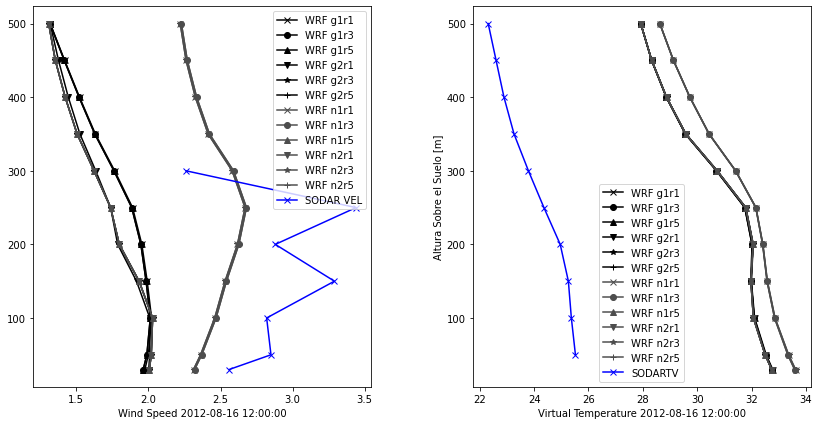

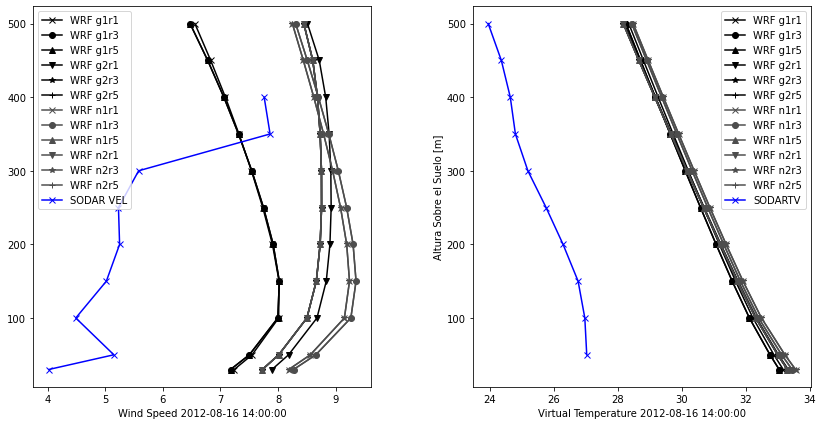

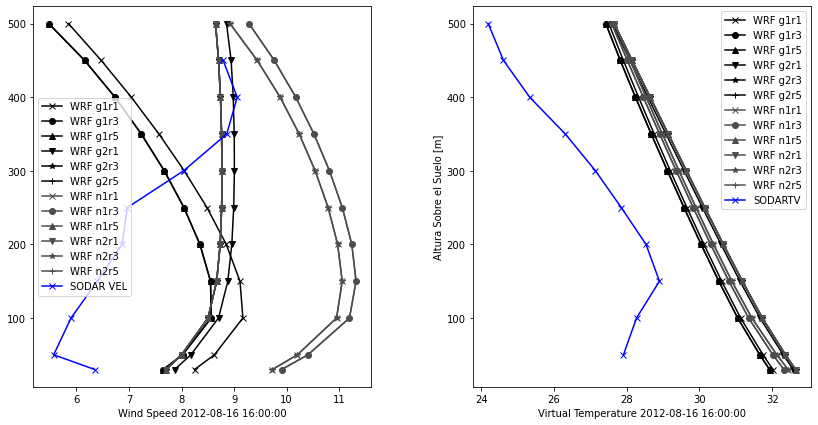

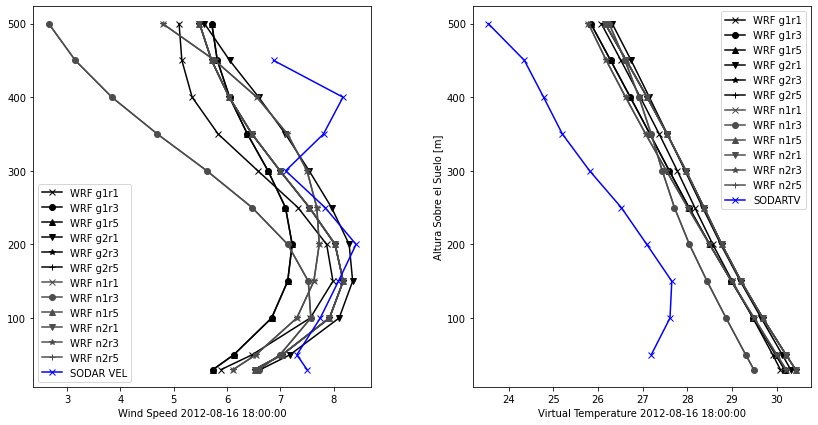

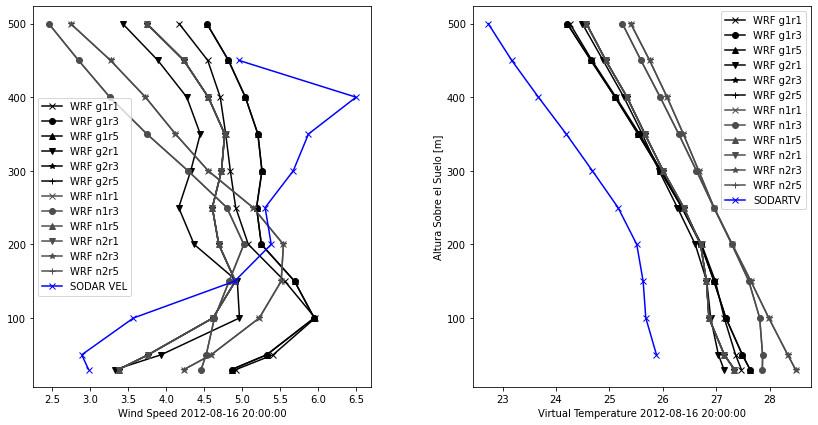

In [9]:
ss = 8
ProfilesPanel(ss-8)
ProfilesPanel(ss-4)
ProfilesPanel(ss)
ProfilesPanel(ss+4)
ProfilesPanel(ss+8)

In [10]:
def ProfilesPanel1(tstart,tend,deltat):
    fig, axs = plt.subplots(1, 2, figsize=(12,7))
    fig.subplots_adjust(left=0.08, right=0.98, wspace=0.3)
    axs[0].set_ylabel('Wind Speed')
    axs[1].set_ylabel('Virtual Temperature')
    plot_levs = [30,50,100,150,200,250,300,350,400,450,500]
    marker=['x', 'o', '^']
    i=0
    for pp in np.arange(tstart,tend,2):
        ax = axs[0]
        ax.plot(w1.iloc[pp,:], plot_levs, label='WRF '+str(w1.iloc[pp,:].name), marker=marker[i], color='k')
        ax.plot(sodarw1.iloc[pp,:], plot_levs, label='SOD '+str(sodarw1.iloc[pp,:].name), marker=marker[i], color='b')
        ax.legend()
        ax = axs[1]
        ax.plot(t1.iloc[pp,:], plot_levs, label='WRF '+str(t1.iloc[pp,:].name), marker=marker[i], color='k')
        ax.plot(sodart1.iloc[pp,:], plot_levs, label='SOD '+str(sodart1.iloc[pp,:].name), marker=marker[i], color='b')        
        ax.legend()
        i=i+1
    #plt.title(' Wind Profile ')
    #plt.ylabel(' m AGL ')
    #plt.xlabel(' Wind Speed ')
    plt.savefig('ProfilesPanel_'+skey+'.png', dpi=300)

In [11]:
def ProfilesPanel2(tstart,tend,deltat):
    fig, axs = plt.subplots(1, 2, figsize=(12,7))
    fig.subplots_adjust(left=0.08, right=0.98, wspace=0.3)
    axs[0].set_ylabel('Wind Speed')
    axs[1].set_ylabel('Virtual Temperature')
    plot_levs = [30,50,100,150,200,250,300,350,400,450,500]
    marker=['x', 'o', '^']
    i=0
    for pp in np.arange(tstart,tend,2):
        ax = axs[0]
        ax.plot(w2.iloc[pp,:], plot_levs, label='WRF '+str(w2.iloc[pp,:].name), marker=marker[i], color='k')
        ax.plot(sodarw2.iloc[pp,:], plot_levs, label='SOD '+str(sodarw2.iloc[pp,:].name), marker=marker[i], color='b')
        ax.legend()
        ax = axs[1]
        ax.plot(t2.iloc[pp,:], plot_levs, label='WRF '+str(t2.iloc[pp,:].name), marker=marker[i], color='k')
        ax.plot(sodart2.iloc[pp,:], plot_levs, label='SOD '+str(sodart2.iloc[pp,:].name), marker=marker[i], color='b')        
        ax.legend()
        i=i+1
    #plt.title(' Wind Profile ')
    #plt.ylabel(' m AGL ')
    #plt.xlabel(' Wind Speed ')
    plt.savefig('ProfilesPanel_'+skey+'.png', dpi=300)

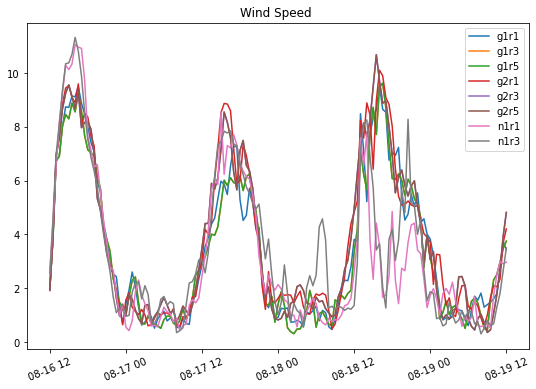

In [12]:
plt.figure(figsize=(9,6))
for i in range(1,9,1):
    plt.plot(eval('w'+str(i)).iloc[:,3], label=expnames[i-1])
#plt.plot(sodarw1)
plt.xticks(rotation=22);
plt.legend();
plt.title('Wind Speed ');
#plt.savefig('TimeSeries_'+skey+'.png', dpi=300)

In [13]:
level=2

# SODAR DATA AT SELECTED LEVEL
sodarw_1 = sodarw1.iloc[:,level]
sodarw_2 = sodarw2.iloc[:,level]
sodarw_3 = sodarw3.iloc[:,level]
sodart_1 = sodart1.iloc[:,level]
sodart_2 = sodart2.iloc[:,level]
sodart_3 = sodart3.iloc[:,level]
x1 = sodart_1.index
x2 = sodart_2.index
x3 = sodart_3.index

# WRF Wind at LEVEL 
w1_1 = w1[dt1s : dt1e].iloc[:,level]
w1_2 = w1[dt2s : dt2e].iloc[:,level]
w1_3 = w1[dt3s : dt3e].iloc[:,level]
w2_1 = w2[dt1s : dt1e].iloc[:,level]
w2_2 = w2[dt2s : dt2e].iloc[:,level]
w2_3 = w2[dt3s : dt3e].iloc[:,level]
w3_1 = w3[dt1s : dt1e].iloc[:,level]
w3_2 = w3[dt2s : dt2e].iloc[:,level]
w3_3 = w3[dt3s : dt3e].iloc[:,level]
w4_1 = w4[dt1s : dt1e].iloc[:,level]
w4_2 = w4[dt2s : dt2e].iloc[:,level]
w4_3 = w4[dt3s : dt3e].iloc[:,level]
w5_1 = w5[dt1s : dt1e].iloc[:,level]
w5_2 = w5[dt2s : dt2e].iloc[:,level]
w5_3 = w5[dt3s : dt3e].iloc[:,level]
w6_1 = w6[dt1s : dt1e].iloc[:,level]
w6_2 = w6[dt2s : dt2e].iloc[:,level]
w6_3 = w6[dt3s : dt3e].iloc[:,level]
w7_1 = w7[dt1s : dt1e].iloc[:,level]
w7_2 = w7[dt2s : dt2e].iloc[:,level]
w7_3 = w7[dt3s : dt3e].iloc[:,level]
w8_1 = w8[dt1s : dt1e].iloc[:,level]
w8_2 = w8[dt2s : dt2e].iloc[:,level]
w8_3 = w8[dt3s : dt3e].iloc[:,level]
# WRF Temp at LEVEL 
t1_1 = t1[dt1s : dt1e].iloc[:,level]
t1_2 = t1[dt2s : dt2e].iloc[:,level]
t1_3 = t1[dt3s : dt3e].iloc[:,level]
t2_1 = t2[dt1s : dt1e].iloc[:,level]
t2_2 = t2[dt2s : dt2e].iloc[:,level]
t2_3 = t2[dt3s : dt3e].iloc[:,level]
t3_1 = t3[dt1s : dt1e].iloc[:,level]
t3_2 = t3[dt2s : dt2e].iloc[:,level]
t3_3 = t3[dt3s : dt3e].iloc[:,level]
t4_1 = t4[dt1s : dt1e].iloc[:,level]
t4_2 = t4[dt2s : dt2e].iloc[:,level]
t4_3 = t4[dt3s : dt3e].iloc[:,level]
t5_1 = t5[dt1s : dt1e].iloc[:,level]
t5_2 = t5[dt2s : dt2e].iloc[:,level]
t5_3 = t5[dt3s : dt3e].iloc[:,level]
t6_1 = t6[dt1s : dt1e].iloc[:,level]
t6_2 = t6[dt2s : dt2e].iloc[:,level]
t6_3 = t6[dt3s : dt3e].iloc[:,level]
skey = sodarw1.keys()[level]
wkey = w1.keys()[level]*1000
print(level, skey, wkey)


2 spd_100 100.0


In [14]:
def rmse(predictions, targets):
    rmse = np.sqrt(np.mean((predictions-targets)**2))
    return rmse 

In [15]:
keys = range(1,9)
exp1, sdv1, rms1, cor1 = {}, {}, {}, {}
for i in keys:
    exp1[i] = eval('w'+str(i)+'.iloc[:,level]')[dt1s : dt1e]
    sdv1[i] = np.std(exp1[i])
    rms1[i] = rmse(sodarw_1, exp1[i])
    cor1[i] = np.corrcoef(sodarw_1, exp1[i].values)[1,0]
sdv1[0] = np.std(sodarw_1)
rms1[0] = rmse(sodarw_1, sodarw_1)
cor1[0] = np.corrcoef(sodarw_1, sodarw_1)[1,0]


spd_100 Experiments


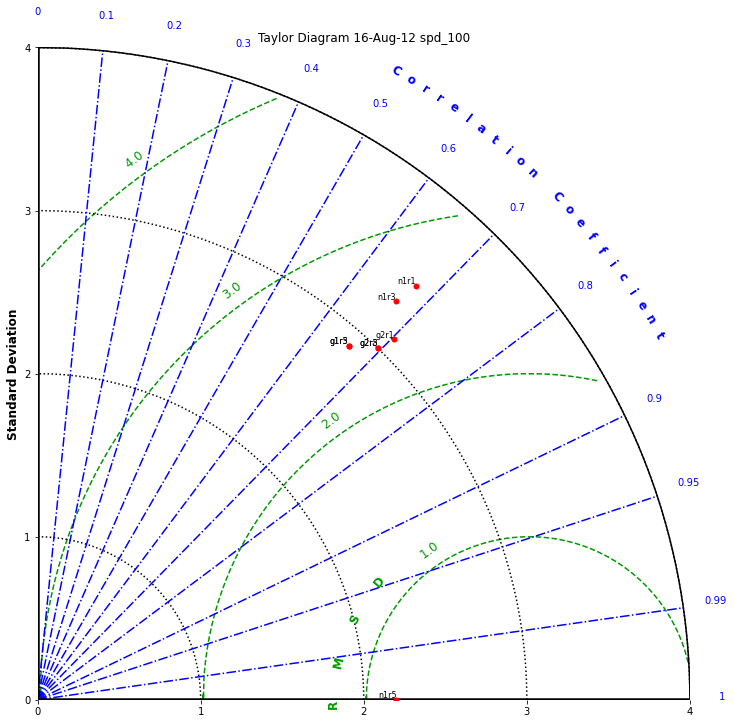

In [17]:
# ds083 GFS NAM
# p1s1 p2s2 p7s7
#expruns = ['20120816_d03_gfs05_p1r1', '20120816_d03_gfs05_p1r5',
#           '20120816_d03_nam32_p1r1', '20120816_d03_nam32_p1r3','20120816_d03_nam32_p1r5',
#           '20120816_d03_nam32_p7r1', '20120816_d03_nam32_p7r3','20120816_d03_nam32_p7r5',]

import skill_metrics as sm

plt.figure(figsize=(12,12))
# Store statistics in arrays
sdev1 = np.array(list(sdv1.values()))
rmse1 = np.array(list(rms1.values()))
corr1 = np.array(list(cor1.values()))

# Produce the Taylor diagram
label = ['g1r1', 'g1r3', 'g1r5', 'g2r1', 'g2r3', 'g2r5', 'n1r1', 'n1r3', 'n1r5', 'n2r1', 'n2r3', 'n2r5', 'Obs']
sm.taylor_diagram(sdev1,rmse1,corr1,
                 markerLabel = label)
plt.title('Taylor Diagram 16-Aug-12 '+skey)
print(skey+' Experiments')
plt.savefig('Taylor_16Aug12_'+skey+'.png', dpi=300)

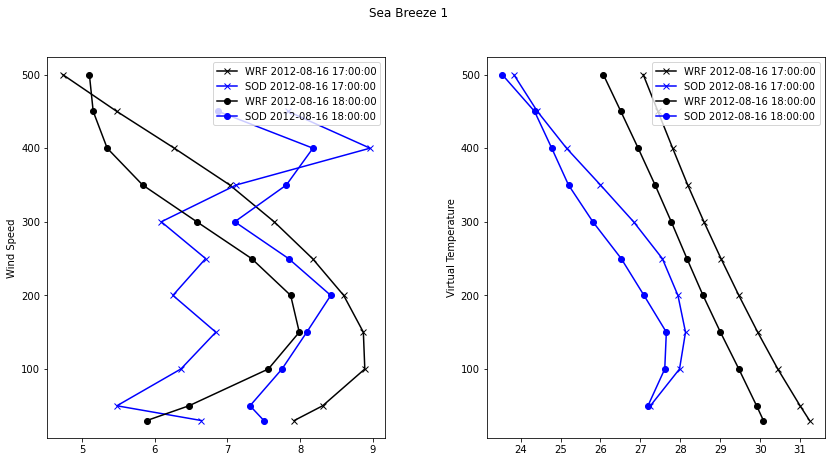

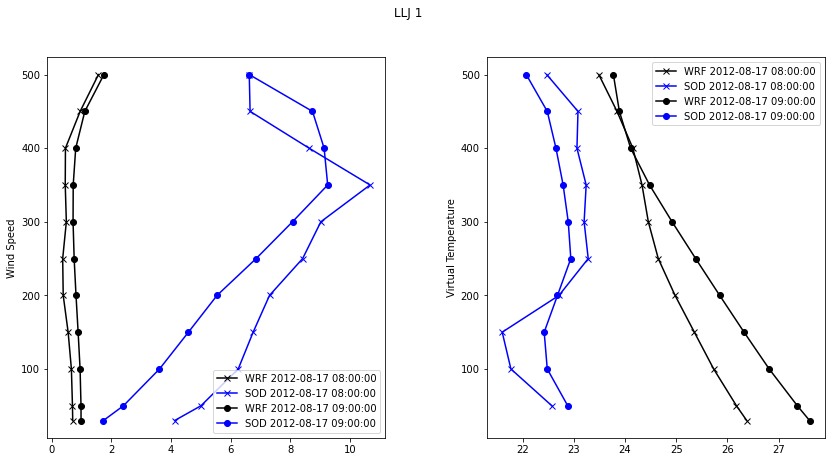

In [18]:
init = 10
ProfilesPanel1(init+0,init+4,3)
plt.suptitle('Sea Breeze 1 ')
plt.savefig('Sea Breeze 1_png', dpi=300)
init = 40
ProfilesPanel1(init+0,init+4,3)
plt.suptitle('LLJ 1 ')
plt.savefig('LLJ 1_.png', dpi=300)

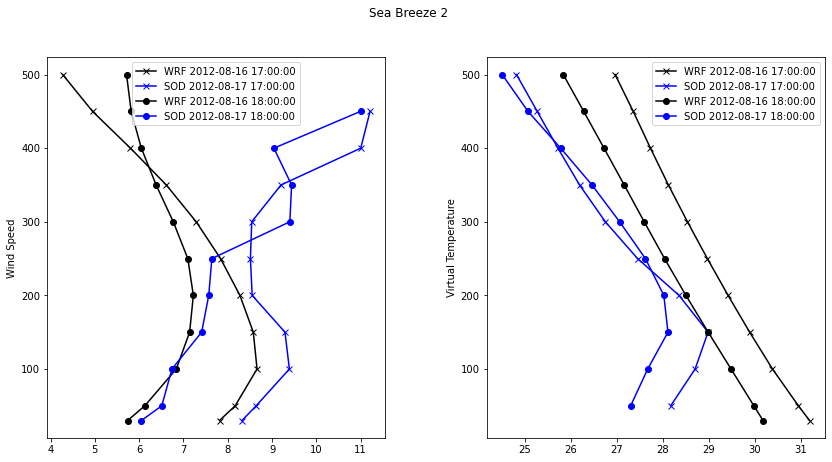

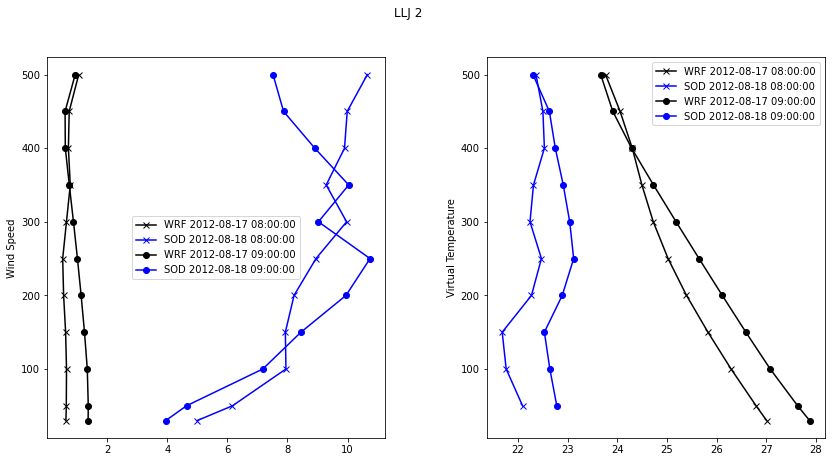

In [19]:
init = 10
ProfilesPanel2(init+0,init+4,3)
plt.suptitle('Sea Breeze 2 ')
plt.savefig('Sea Breeze 2_png', dpi=300)
init = 40
ProfilesPanel2(init+0,init+4,3)
plt.suptitle('LLJ 2 ')
plt.savefig('LLJ 2_.png', dpi=300)

In [20]:
print(sdev1, '\n', rmse1, '\n', corr1)

[3.01576519 2.88888383 2.88888383 3.11093259 3.00295925 3.00295925
 3.44021964 3.28792477 2.20089823] 
 [2.26333047 2.19146396 2.19146396 2.2112795  2.16330548 2.16330548
 2.56529651 2.48498497 0.        ] 
 [0.66645493 0.66006895 0.66006895 0.70342482 0.69466301 0.69466301
 0.67498112 0.66903363 1.        ]


In [21]:
dicts = {}
keys = range(4)
values = ["Hi", "I", "am", "John"]
for i in keys:
        dicts[i] = values[i]
print(dicts)

{0: 'Hi', 1: 'I', 2: 'am', 3: 'John'}
